A churn prediction Prpject:  the dataset of an Iranian internet services company to analyze customer behavior churn.The project process includes cleaning redundant features, handling missing data, examining outlier data, encoding, splitting data into training and testing sets, and running various classification models.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
#accuracy_score(y_test,y_pred)

In [2]:
data=pd.read_excel('churnShatel.xlsx')
data

,code,next operator,reasons,استان,شهر,speed,churn,CSCalls,SalesCalls,namava,shoteltalk,casper,Android Security,VocNo,195No
0,41661474,استفاده ای ندارند,افت سرعت/قطعی سرویس,تهران,تهران,8192,0,7,3,0,0,0,0,0,0
1,41661471,استفاده ای ندارند,افت سرعت/قطعی سرویس,تهران,تهران,8192,0,1,6,0,0,0,0,0,0
2,41661457,استفاده ای ندارند,افت سرعت/قطعی سرویس,تهران,تهران,512,0,7,6,0,0,0,0,0,0
3,41661447,استفاده ای ندارند,افت سرعت/قطعی سرویس,آذربایجان شرقی,تبریز,512,0,5,4,0,0,0,0,0,0
4,41661306,آسیاتک,افت سرعت/قطعی سرویس,آذربایجان شرقی,تبریز,512,0,1,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,41572306,NaN,NaN,NaN,NaN,4096,1,23,20,0,0,0,0,0,0
1495,41572242,NaN,NaN,NaN,NaN,8192,1,20,9,0,0,0,0,0,0
1496,41572220,NaN,NaN,NaN,NaN,1024,1,3,19,0,0,0,0,0,0
1497,41572213,NaN,NaN,NaN,NaN,8192,1,2,10,0,0,0,0,0,0


In [3]:
data_comp=data.copy()

In [4]:
data_comp.set_index('code')

,next operator,reasons,استان,شهر,speed,churn,CSCalls,SalesCalls,namava,shoteltalk,casper,Android Security,VocNo,195No
code,,,,,,,,,,,,,,
41661474,استفاده ای ندارند,افت سرعت/قطعی سرویس,تهران,تهران,8192,0,7,3,0,0,0,0,0,0
41661471,استفاده ای ندارند,افت سرعت/قطعی سرویس,تهران,تهران,8192,0,1,6,0,0,0,0,0,0
41661457,استفاده ای ندارند,افت سرعت/قطعی سرویس,تهران,تهران,512,0,7,6,0,0,0,0,0,0
41661447,استفاده ای ندارند,افت سرعت/قطعی سرویس,آذربایجان شرقی,تبریز,512,0,5,4,0,0,0,0,0,0
41661306,آسیاتک,افت سرعت/قطعی سرویس,آذربایجان شرقی,تبریز,512,0,1,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41572306,NaN,NaN,NaN,NaN,4096,1,23,20,0,0,0,0,0,0
41572242,NaN,NaN,NaN,NaN,8192,1,20,9,0,0,0,0,0,0
41572220,NaN,NaN,NaN,NaN,1024,1,3,19,0,0,0,0,0,0


### Data Preprocessing

#### change attribute name

In [5]:
data.columns = [column.replace('شهر','city') for column in data.columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 41661474 to 41572181
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   next operator     70 non-null     object
 1   reasons           70 non-null     object
 2   استان             748 non-null    object
 3   city              748 non-null    object
 4   speed             1499 non-null   int64 
 5   churn             1499 non-null   int64 
 6   CSCalls           1499 non-null   int64 
 7   SalesCalls        1499 non-null   int64 
 8   namava            1499 non-null   int64 
 9   shoteltalk        1499 non-null   int64 
 10  casper            1499 non-null   int64 
 11  Android Security  1499 non-null   int64 
 12  VocNo             1499 non-null   int64 
 13  195No             1499 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 175.7+ KB


In [6]:
data.isnull().sum()

code                   0
next operator       1429
reasons             1429
استان                751
شهر                  751
speed                  0
churn                  0
CSCalls                0
SalesCalls             0
namava                 0
shoteltalk             0
casper                 0
Android Security       0
VocNo                  0
195No                  0
dtype: int64

#### features with most missing value


In [4]:

del data['next operator'],data['reasons'],data['code']

### duplicate feature with corralation

In [5]:
data['استان'].value_counts()

تهران             498
البرز             112
اصفهان             83
آذربایجان شرقی     55
Name: استان, dtype: int64

In [6]:
data['شهر'].value_counts()

تهران     498
کرج       112
اصفهان     83
تبریز      55
Name: شهر, dtype: int64

In [7]:


del data['استان']

In [9]:
data.head()
del data['code']

In [7]:
data.head()

,city,speed,churn,CSCalls,SalesCalls,namava,shoteltalk,casper,Android Security,VocNo,195No
0,تهران,8192,0,7,3,0,0,0,0,0,0
1,تهران,8192,0,1,6,0,0,0,0,0,0
2,تهران,512,0,7,6,0,0,0,0,0,0
3,تبریز,512,0,5,4,0,0,0,0,0,0
4,تبریز,512,0,1,4,0,0,1,0,0,0


##### replace missing value with mode

In [9]:
data['city']=data['city'].fillna('تهران')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              1499 non-null   object
 1   speed             1499 non-null   int64 
 2   churn             1499 non-null   int64 
 3   CSCalls           1499 non-null   int64 
 4   SalesCalls        1499 non-null   int64 
 5   namava            1499 non-null   int64 
 6   shoteltalk        1499 non-null   int64 
 7   casper            1499 non-null   int64 
 8   Android Security  1499 non-null   int64 
 9   VocNo             1499 non-null   int64 
 10  195No             1499 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 128.9+ KB


### Encoding

In [10]:

lb = LabelEncoder()

data['city']=lb.fit_transform(data['city'])

In [11]:
data.head()

,city,speed,churn,CSCalls,SalesCalls,namava,shoteltalk,casper,Android Security,VocNo,195No
0,2,8192,0,7,3,0,0,0,0,0,0
1,2,8192,0,1,6,0,0,0,0,0,0
2,2,512,0,7,6,0,0,0,0,0,0
3,1,512,0,5,4,0,0,0,0,0,0
4,1,512,0,1,4,0,0,1,0,0,0


In [11]:
data['city'].value_counts()

2    1249
3     112
0      83
1      55
Name: city, dtype: int64

In [20]:
data.describe()

,city,speed,churn,CSCalls,SalesCalls,namava,shoteltalk,casper,Android Security,VocNo,195No
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,1.927285,5158.596398,0.498332,4.060040,10.559706,0.009340,0.002668,0.097398,0.013342,0.030687,0.013342
std,0.572555,4807.360146,0.500164,4.543411,6.099498,0.096221,0.051605,0.296598,0.114774,0.194360,0.170864
min,0.000000,128.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,512.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4096.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,8192.000000,1.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,16384.000000,1.000000,49.000000,43.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000


In [12]:
li = ['city','churn','namava','shoteltalk','casper','Android Security']

data[li]=data[li].astype(str)

In [13]:
data.describe()

,speed,CSCalls,SalesCalls,VocNo,195No
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,5158.596398,4.060040,10.559706,0.030687,0.013342
std,4807.360146,4.543411,6.099498,0.194360,0.170864
min,128.000000,0.000000,2.000000,0.000000,0.000000
25%,512.000000,1.000000,6.000000,0.000000,0.000000
50%,4096.000000,3.000000,9.000000,0.000000,0.000000
75%,8192.000000,5.000000,13.000000,0.000000,0.000000
max,16384.000000,49.000000,43.000000,2.000000,5.000000


#shewhart method for outliers

Outlier values have been observed in the data, and their number is not insignificant. However, since the above statistical method is univariate, we do not delete these values. Also, in the box plot, we do not have any values outside the upper range.

In [27]:
5158.59+3*4807.3

19580.49

In [23]:
4.06 + 3*4.543

17.689

In [24]:
4.06 - 3*4.543

-9.569000000000003

In [26]:
data.query('CSCalls>30')

,city,speed,churn,CSCalls,SalesCalls,namava,shoteltalk,casper,Android Security,VocNo,195No
885,2,4096,1,32,11,0,0,0,0,0,0
975,2,8192,1,49,18,0,0,0,0,0,0
1038,2,8192,1,37,12,0,0,0,0,0,0
1055,2,1024,1,31,39,0,0,0,0,0,2
1327,2,512,1,35,20,0,0,1,0,0,0
1341,2,4096,1,32,24,0,0,0,0,0,0


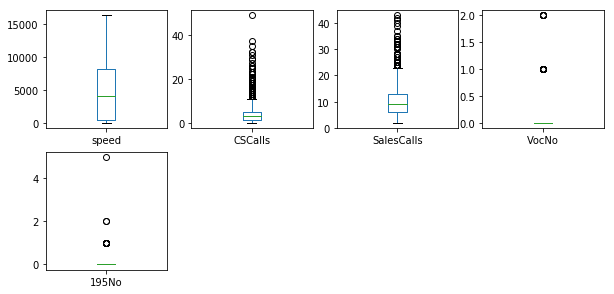

In [29]:
data.plot(kind='box',figsize=(10,10),layout=(4,4),subplots=True)
plt.show()

### classification:churn prediction

#### split input and output

In [13]:


y = data['churn']

x = data.drop('churn',axis=1)

In [31]:
y.value_counts()

0    752
1    747
Name: churn, dtype: int64

In [ ]:
#x_train = x.iloc[0:1200,:]

#x_test = x.iloc[1200:,:]

In [14]:
#split train and test with startify sampling


x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,
                                               random_state=42)
x_train

,city,speed,CSCalls,SalesCalls,namava,shoteltalk,casper,Android Security,VocNo,195No
807,2,8192,25,16,0,0,0,1,0,0
1228,2,8192,4,8,0,0,0,0,0,0
1479,2,1024,0,2,0,0,0,0,0,0
1435,2,1024,1,11,0,0,0,0,0,0
179,2,16384,13,12,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1130,2,8192,17,17,0,0,0,0,0,0
1294,2,8192,4,14,0,0,0,0,0,0
860,2,2048,15,14,0,0,0,0,0,0
1459,2,1024,2,19,0,0,0,0,0,0


In [34]:
y_train

807     1
1228    1
1479    1
1435    1
179     0
       ..
1130    1
1294    1
860     1
1459    1
1126    1
Name: churn, Length: 1124, dtype: object

In [36]:
#unseen records

y_test

1116    1
1395    1
422     0
413     0
451     0
       ..
155     0
1150    1
1140    1
974     1
1057    1
Name: churn, Length: 375, dtype: object

### model 1: decition tree

In [15]:


dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)

#train on train set:75%

dt.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [19]:
#predict on test set:25%(apply model)

y_pred=dt.predict(x_test)

#acc on test set
accuracy_score(y_test,y_pred)

0.832

In [22]:
yp_train =dt.predict(x_train)


#acc on train set
accuracy_score(y_train,yp_train)

0.9048042704626335

In [20]:
from sklearn.neural_network import MLPClassifier



mlp=MLPClassifier(hidden_layer_sizes=(5,5),activation='relu',
                 solver='sgd',momentum=0.89,max_iter=200,batch_size=5,
                 learning_rate_init=0.2,random_state=42)

mlp.fit(x_train,y_train)

ymlp=mlp.predict(x_test)

#acc on test set
accuracy_score(y_test,ymlp)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.48533333333333334

In [18]:
#acc on train set

ymlpt=mlp.predict(x_train)

accuracy_score(y_train,ymlpt)

0.5071174377224199

In [41]:
y_test

1116    1
1395    1
422     0
413     0
451     0
       ..
155     0
1150    1
1140    1
974     1
1057    1
Name: churn, Length: 375, dtype: object

In [52]:
confusion_matrix(y_test,y_pred)

array([[147,  35],
       [ 28, 165]], dtype=int64)

In [20]:
con_mat=pd.crosstab(y_test,y_pred,rownames=['Actual_Data'],
            colnames=['Predict_data'],margins=True)


display(con_mat)

Predict_data,0,1,All
Actual_Data,,,
0,147,35,182
1,28,165,193
All,175,200,375


yes = 1
No = 0

false positive = 35

false negative = 28

In [21]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       182
           1       0.82      0.85      0.84       193

    accuracy                           0.83       375
   macro avg       0.83      0.83      0.83       375
weighted avg       0.83      0.83      0.83       375



### model2: knn

In [22]:


knn=KNeighborsClassifier(n_neighbors=15,weights='uniform')


knn.fit(x_train,y_train)

y_knn=knn.predict(x_test)


accuracy_score(y_knn,y_test)

0.832

In [23]:
#model3: Naive beyes



nb=GaussianNB()


nb.fit(x_train,y_train)

y_nb=nb.predict(x_test)


accuracy_score(y_nb,y_test)


0.7653333333333333

In [72]:
print(classification_report(y_nb,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       224
           1       0.73      0.97      0.83       151

    accuracy                           0.84       375
   macro avg       0.85      0.86      0.84       375
weighted avg       0.87      0.84      0.84       375



In [24]:



lg = LogisticRegression(C=1,random_state=42)


lg.fit(x_train,y_train)

ylg=lg.predict(x_test)

accuracy_score(ylg,y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8026666666666666

### ensemble learning

### bagging DT

In [41]:



dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)


baggDt=BaggingClassifier(base_estimator=dt,n_estimators=20,max_samples=0.5,
                 random_state=42)


baggDt.fit(x_train,y_train)

ybagg=baggDt.predict(x_test)

accuracy_score(ybagg,y_test)


0.8453333333333334

### bagging KNN

In [49]:



knn=KNeighborsClassifier(n_neighbors=15,weights='uniform')


baggknn=BaggingClassifier(base_estimator=knn,n_estimators=10,max_samples=0.5,
                 random_state=42)


baggknn.fit(x_train,y_train)

yb=baggknn.predict(x_test)

accuracy_score(yb,y_test)

0.824

### boostingDT

In [58]:


dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)


boostDt=AdaBoostClassifier(base_estimator=dt,n_estimators=10,learning_rate=1.0,
                 random_state=42)


boostDt.fit(x_train,y_train)

yboost=boostDt.predict(x_test)

accuracy_score(yboost,y_test)



0.8

### voting classifier

In [62]:



clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)

clf2=KNeighborsClassifier(n_neighbors=15,weights='uniform')

clf3 = LogisticRegression(C=0.6,random_state=42)



voting = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)], voting='hard')


voting.fit(x_train,y_train)

yvoting=voting.predict(x_test)

accuracy_score(yvoting,y_test)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8293333333333334

### stackingClassifier

In [63]:


clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)

clf2=KNeighborsClassifier(n_neighbors=15,weights='uniform')

clf3 = LogisticRegression(C=0.6,random_state=42)

from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

list_estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)]



stacking=StackingClassifier(estimators=list_estimators,final_estimator=RF)


stacking.fit(x_train,y_train)

ystack=stacking.predict(x_test)

accuracy_score(ystack,y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.816